## Linear Regression Project

We'll work with a data set of an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. In order to achieve this goal we'll follow the steps below to analyze the customer data (it's fake, we do not gave real credit card numbers or emails).! Let's get started!

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

## Let us get data

We'll work with the Ecommerce Customers csv file from the company

In [7]:
customers = pd.read_csv('Ecommerce Customers')

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


The data set has Customer info, suchas Email, Address, and their color Avatar. Then everyone else columns has numerical values

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customers.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

## Exploratory Data Analysis

Let's explore these types of relationships across the entire data set

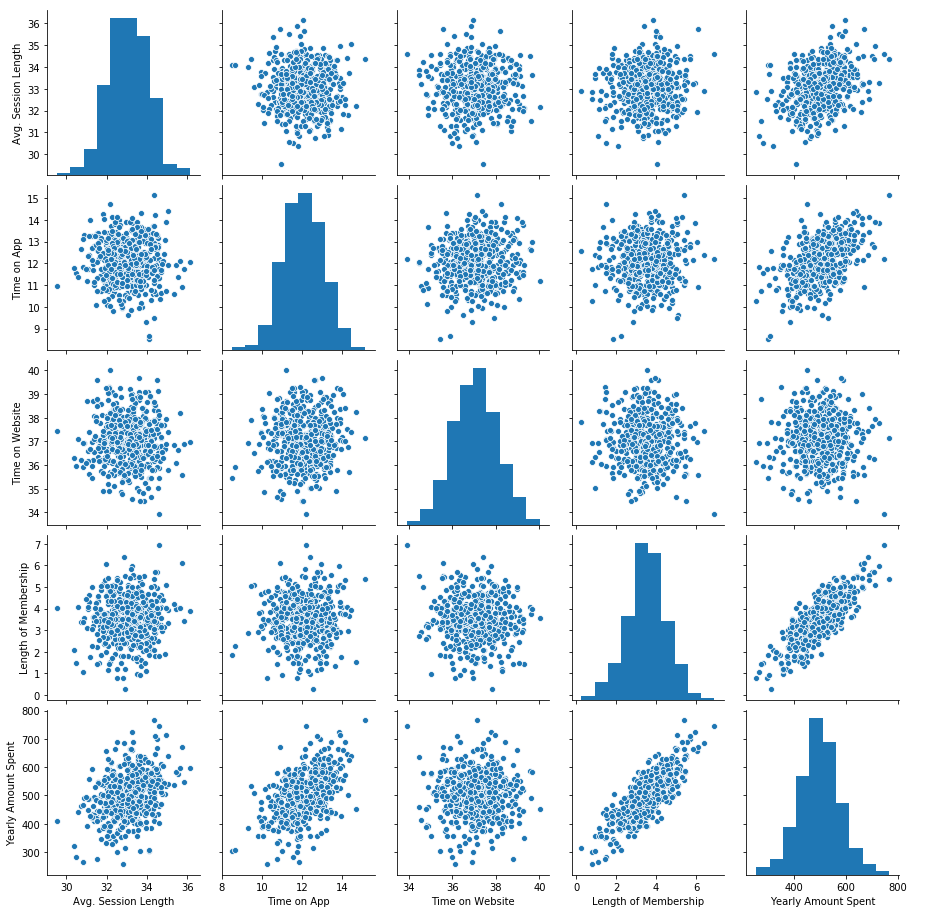

In [18]:
sns.pairplot(customers)

From this global figure we can see that thre is a strong positive correlation between Length of Membership and Yearly Amount Spent. We can then expect that the Length of Membership is the most important feature we must focus in order to obtain a higher revenue.

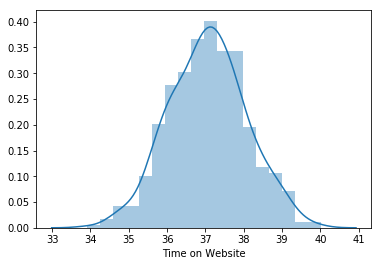

In [9]:
sns.distplot(customers['Time on Website'])

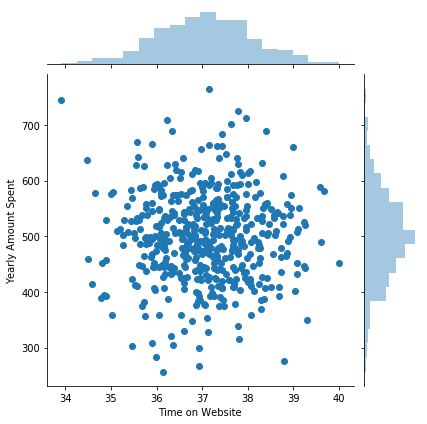

In [10]:
sns.jointplot(data=customers, x="Time on Website", y="Yearly Amount Spent")

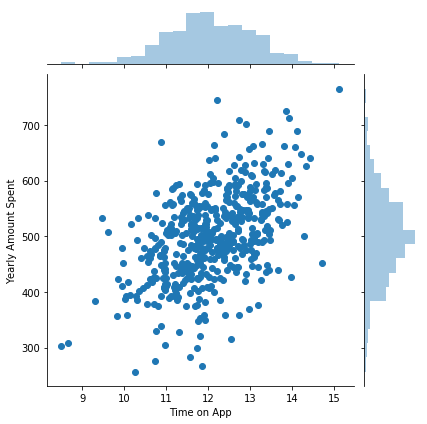

In [11]:
sns.jointplot(data=customers, x="Time on App", y="Yearly Amount Spent")

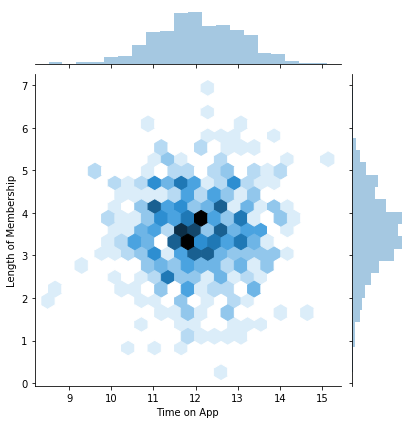

In [12]:
sns.jointplot(data=customers, x="Time on App", y="Length of Membership", kind="hex")

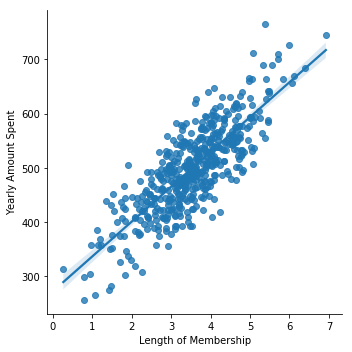

In [14]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

## Training and testing data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. We set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [10]:
customers.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

In [12]:
y=customers['Yearly Amount Spent']

In [13]:
x=customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
predictions = lm.predict(x_test)

In [37]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [20]:
print('Coefficients: \n', lm.coef_)

('Coefficients: \n', array([25.98154972, 38.59015875,  0.19040528, 61.27909654]))


Text(0,0.5,'Predicted Values')

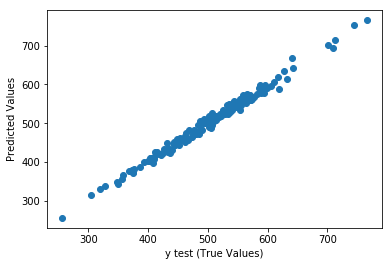

In [40]:
plt.scatter(y_test, predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted Values')

Therefore our model is a very nice model since the error associated with prediction are very small when we look for the last figure. So we expect that the error distribution is approximately Gaussian. To make sure it looks normally distributed we plot a histogram of the residuals:

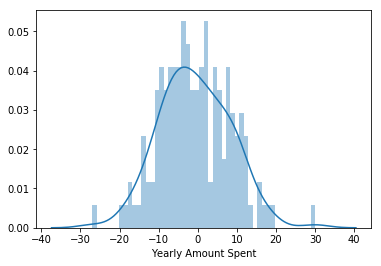

In [21]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [23]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


We can interpret that coefficients like:

- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.